In [1]:
import numpy as np
import math
import xarray as xr
from numpy import ma
import sys
import os


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
plt.rcParams['font.family'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

import datetime
today=datetime.date.today()

from scipy.ndimage import gaussian_filter


import warnings

warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action="ignore", message="input array is constant; the correlation coefficient is not defined")
import logging
logging.captureWarnings(True)
import matplotlib.ticker as ticker
from scipy.signal import resample

<xarray.DataArray 'ssta_reconstructed' (time: 2001, lat: 89, lon: 180)> Size: 128MB
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.026946e-04, -1.057670e-04, ..., -2.966727e-04, -1.550518e-04],
        [ 1.550471e-04,  1.531969e-04, ...,  1.321308e-04,  1.531204e-04]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.611944e-04, -1.726647e-04, ..., -3.334932e-04, -2.034255e-04],
        [ 9.567898e-05,  9.268812e-05, ...,  8.291032e-05,  9.617690e-05]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.724268e-04, -1.855096e-04, ..., -3.405630e-04, -2.127137e-04],
        [ 8.427977e-05,  8.106991e-

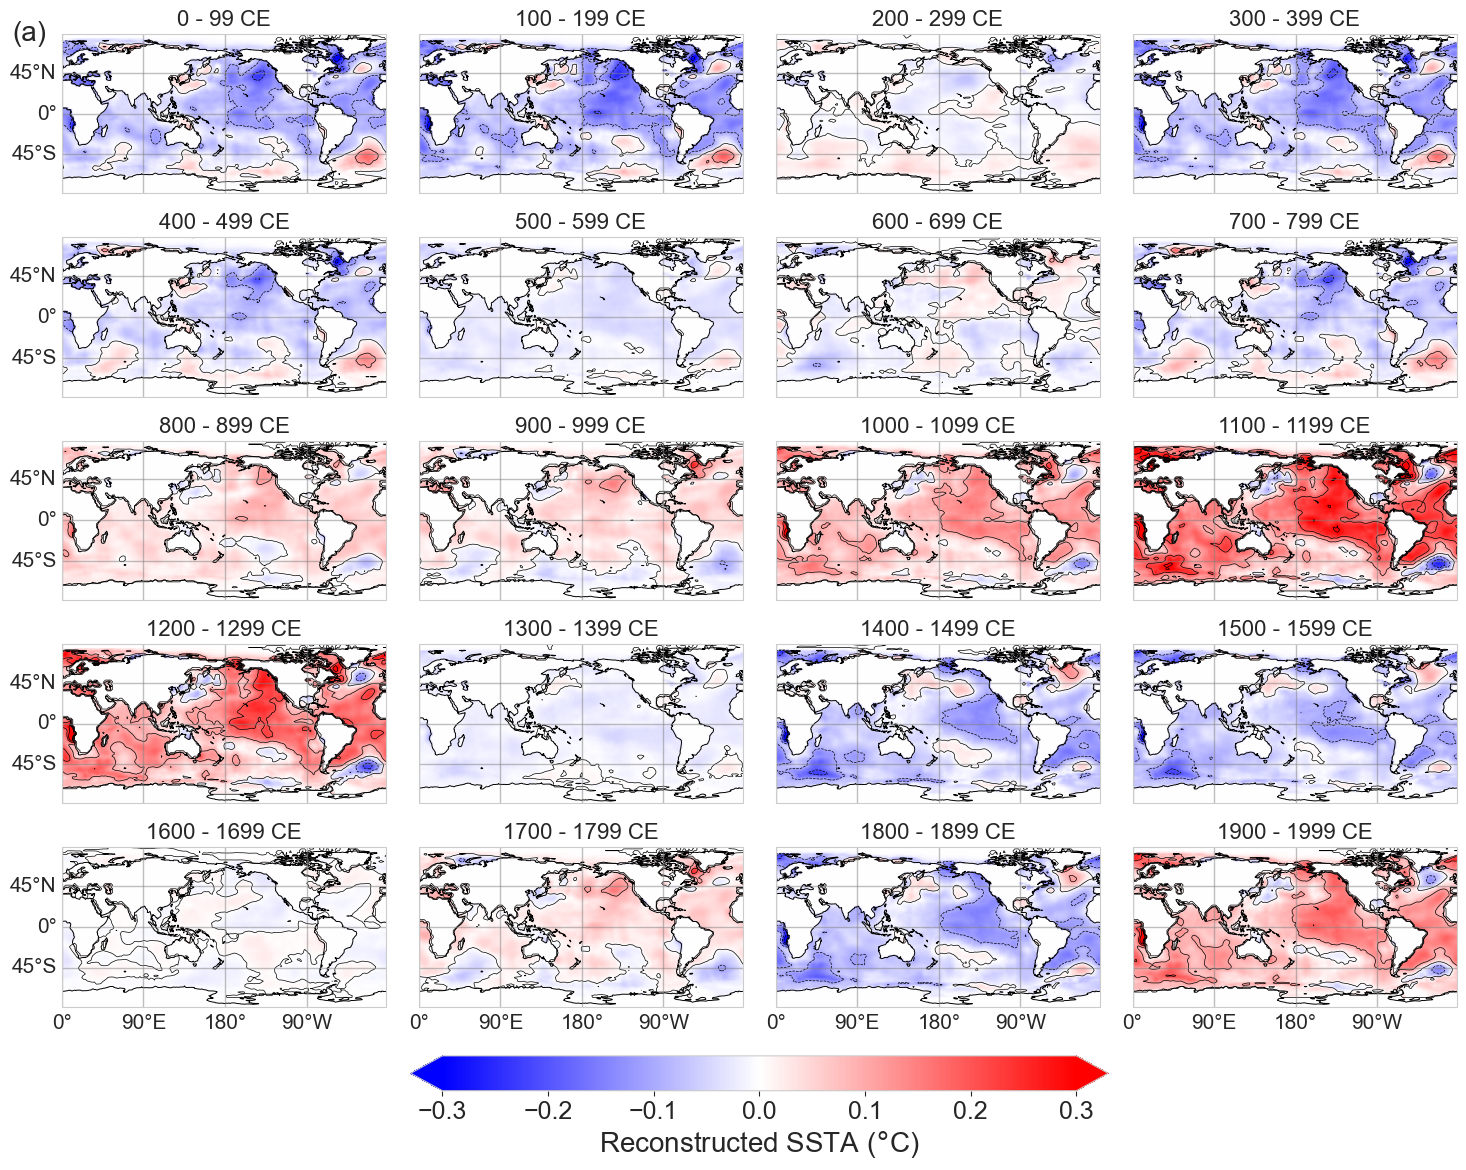

In [18]:



proj = ccrs.PlateCarree(central_longitude=180)
import matplotlib as mpl
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter,LatitudeLocator

levels=np.linspace(-0.3,0.3,7)
fig, ax = plt.subplots(5, 4, subplot_kw=dict(projection=proj),figsize=[18,16],sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ssta_reco=xr.open_dataset('./new_outputs/smoothed/ssta_reco.nc')

av2000=ssta_reco['ssta_reconstructed'].mean(dim='time')
av2000
long_years=np.arange(-10,2017)
ssta_reco1=ssta_reco['ssta_reconstructed'].isel(time=slice(10,-16))
print(ssta_reco1)

for i in range(0, 20):

    recosub=ssta_reco1[i*100:(i+1)*100]

    j=int(i/4)
    k=int(i%4)
    cs=ax[j,k].pcolormesh(recosub.lon.values, recosub.lat.values, np.mean(recosub,axis=0)-av2000, transform=ccrs.PlateCarree(),vmin=-0.3,vmax=0.3,cmap='bwr',shading='gouraud',antialiased=True)
    #cs = ax[j,k].contourf(recosub.lon.values, recosub.lat.values, np.mean(recosub,axis=0)-av2000, transform=ccrs.PlateCarree(),levels=levels,cmap='bwr',extend='both')
    contour1 = ax[j,k].contour(recosub.lon.values, recosub.lat.values, np.mean(recosub,axis=0)-av2000, transform=ccrs.PlateCarree(),colors='k',levels=levels,linewidths=0.5,linestyle='.')
   # land=ax[j,k].add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='k')
    #cb = plt.colorbar(cs,ax=ax[j,k], orientation='vertical')
    gl = ax[j,k].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, color='gray', alpha=0.5 )


    gl.xlocator = mticker.FixedLocator([0, 90, 180, -90])
    gl.ylocator = mticker.FixedLocator([-90,-45, 0, 45 ,90])

    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}

    if k==0:
        gl.top_labels = False
        gl.left_labels = True
        gl.right_labels = False
        gl.bottom_labels= False

    if j==4:
        gl.bottom_labels= True

    ax[j,k].coastlines(linewidth=0.7)

    syear=long_years[10+i*100]
    eyear=long_years[10+(i+1)*100-1]
    ax[j,k].set_title('{} - {} CE'.format(syear,eyear), fontsize=16)




#cb = plt.colorbar(cs,ax=ax[4,2], orientation='horizontal')
cb=plt.colorbar(cs, ax=ax, shrink=0.5, pad=0.04, orientation='horizontal' ,extend='both',location='bottom')
cb.ax.tick_params(labelsize=18)
cb.set_label(label='Reconstructed SSTA ($\degree$C)',size=20)

plt.text(-0.1, 1, '(a)',
     size=20,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax[0,0].transAxes)

plt.savefig('plots/reconstructed_ssta_smoothed_{}.png'.format(today),bbox_inches="tight")

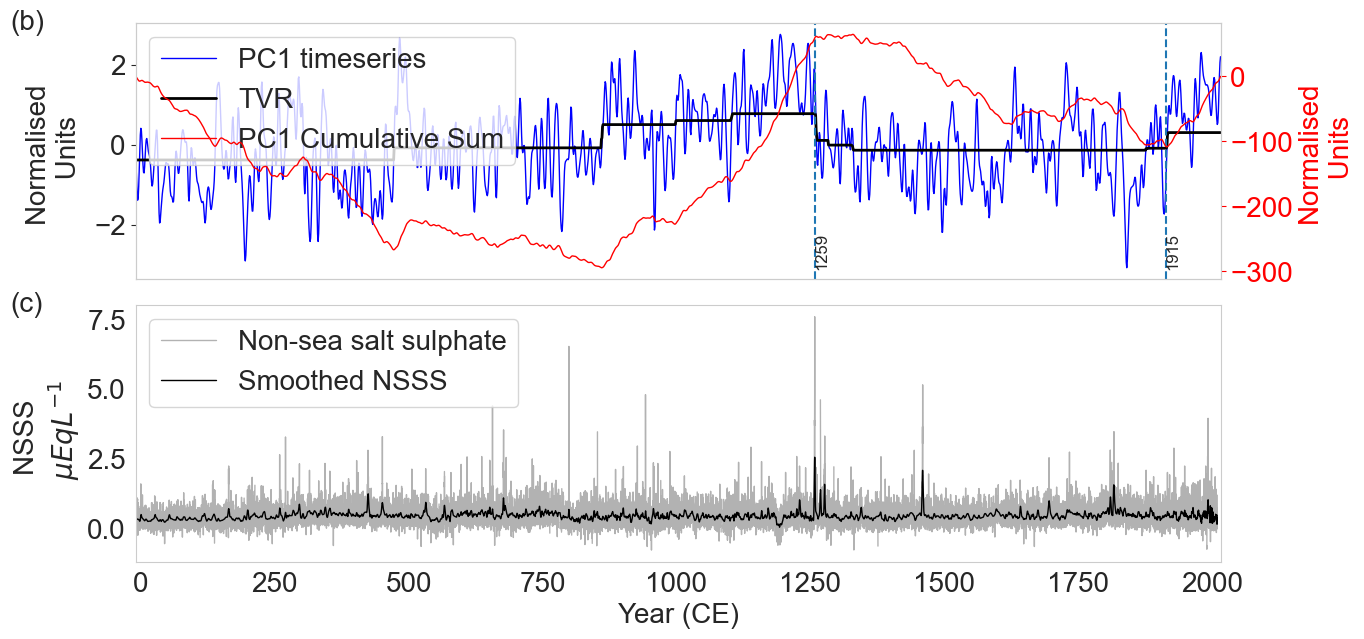

In [16]:
textfontsize=12
labelfontsize=20
today= datetime.date.today()

pc1_smooth=np.loadtxt('eof1_timeseries_smooth.csv')
tvr_output=np.loadtxt('../data/tvr_output.txt',skiprows=3)
sulfate=np.flipud(np.genfromtxt('../data/LD_sulphate_2.csv',delimiter=',', skip_header=1))
cusum1_smooth=np.loadtxt('cumsum1_smooth.csv')
long_years=np.arange(-10,2017)

sulfate2=np.flipud(np.genfromtxt('../data/LD_sulphate_2.csv',delimiter=',', skip_header=1))

Sulfmean=np.nanmean(sulfate2[:,4])
sulfate2[np.isnan(sulfate2)]=Sulfmean

res_sulphate=resample(sulfate2[:,4],len(long_years),axis=0)

fig, ax = plt.subplots(2, 1, sharex=True,gridspec_kw={'hspace': 0.1},figsize=[14,7])
ax[0].yaxis.get_major_formatter().set_scientific(False)
lpc1,=ax[0].plot(long_years, pc1_smooth[:,1], color='b', linewidth=1, label='PC1 timeseries')
ltvr,=ax[0].plot(tvr_output[:,0], tvr_output[:,2], color='k', linewidth=2,label='TVR')


ax[0].tick_params(axis='y', labelsize=labelfontsize )

axr=ax[0].twinx()
lcsum,=axr.plot(long_years, cusum1_smooth[:,1], color='r', linewidth=1, label='PC1 Cumulative Sum')

ax[0].legend(handles=[lpc1,ltvr,lcsum],loc=2,fontsize=labelfontsize)

ax[1].set_xlabel('Year (CE)',fontsize=labelfontsize)
axr.set_ylabel('Normalised \n Units',fontsize=labelfontsize,color='r',multialignment='center')
axr.tick_params(axis='y',color='r',labelcolor='r', labelsize=labelfontsize)



ax[1].plot(sulfate[:,3], sulfate[:,4],color='k', alpha=0.3,linewidth=1, label='Non-sea salt sulphate')
ax[1].plot(sulfate[:,3], gaussian_filter(sulfate2[:,4],8), color='k', linewidth=1, label='Smoothed NSSS')


ax[1].tick_params(axis='y',labelsize=labelfontsize)

ax[1].tick_params(axis='x',labelsize=labelfontsize)

ax[0].set_ylabel('Normalised \n Units',fontsize=labelfontsize,multialignment='center')
ax[1].set_ylabel('NSSS \n $\mu Eq L^{-1}$',fontsize=labelfontsize,multialignment='center')

ax[0].set_xlim(-10, 2016)
ax[1].legend(loc=2,fontsize=labelfontsize)

ax[0].axvline(x=1259,linestyle='--',label='1259')
ax[0].axvline(x=1915,linestyle='--',label='1915')
ax[0].grid(False)
ax[1].grid(False)
axr.grid(False)
plt.text(1257, 0.05, '1259',
     size=textfontsize,
         rotation=90,
     transform = ax[0].get_xaxis_transform())
plt.text(1913, 0.05, '1915',
     size=textfontsize,
         rotation=90,
     transform = ax[0].get_xaxis_transform())


fig.align_ylabels()
plt.text(-0.1, 1, '(b)',
     size=labelfontsize,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax[0].transAxes)

plt.text(-0.1, 1, '(c)',
     size=labelfontsize,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax[1].transAxes)




plt.savefig('plots/PC1_TVR_cusum_{}.png'.format(today))